<a href="https://colab.research.google.com/github/jibbsmathew/BD_MDD_Cross_Validation/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.1.0

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,\
RepeatedKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os, sys, itertools, re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import mean
import sklearn.model_selection as models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
data = pd.read_csv('BP-MDD.txt')

In [ ]:
column_name=[]
for x in range(1,46):
    feature="feature_"+str(x)
    column_name=column_name + [feature]
column_name.append('BD/MDD')

In [ ]:
for x in range(0,46):
    print(column_name[x])

feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
feature_22
feature_23
feature_24
feature_25
feature_26
feature_27
feature_28
feature_29
feature_30
feature_31
feature_32
feature_33
feature_34
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_42
feature_43
feature_44
feature_45
BD/MDD


In [ ]:
data.columns = column_name
data.head(10)
column_name.remove('BD/MDD')

In [ ]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,BD/MDD
0,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202,1
1,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460,1
2,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199,1
3,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891,1
4,0.038326,0.051661,0.076422,0.069742,0.063791,0.037135,0.071507,0.092933,0.071394,0.077786,...,0.068092,0.063824,0.090633,0.076051,0.092445,0.055599,0.089684,0.058997,0.062982,1


In [ ]:
data.dtypes   

feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
feature_26    float64
feature_27    float64
feature_28    float64
feature_29    float64
feature_30    float64
feature_31    float64
feature_32    float64
feature_33    float64
feature_34    float64
feature_35    float64
feature_36    float64
feature_37    float64
feature_38    float64
feature_39    float64
feature_40    float64
feature_41    float64
feature_42    float64
feature_43    float64
feature_44    float64
feature_45    float64
BD/MDD    

In [ ]:
data.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
BD/MDD        0
dtype: int64

In [ ]:
df_skew = pd.DataFrame(data={
    'skewness': data.skew()
})

df_skew

,skewness
feature_1,2.363176
feature_2,1.233927
feature_3,1.358469
feature_4,1.486730
feature_5,1.132198
feature_6,2.512691
feature_7,2.707865
feature_8,0.955730
feature_9,0.800142
feature_10,-0.417926


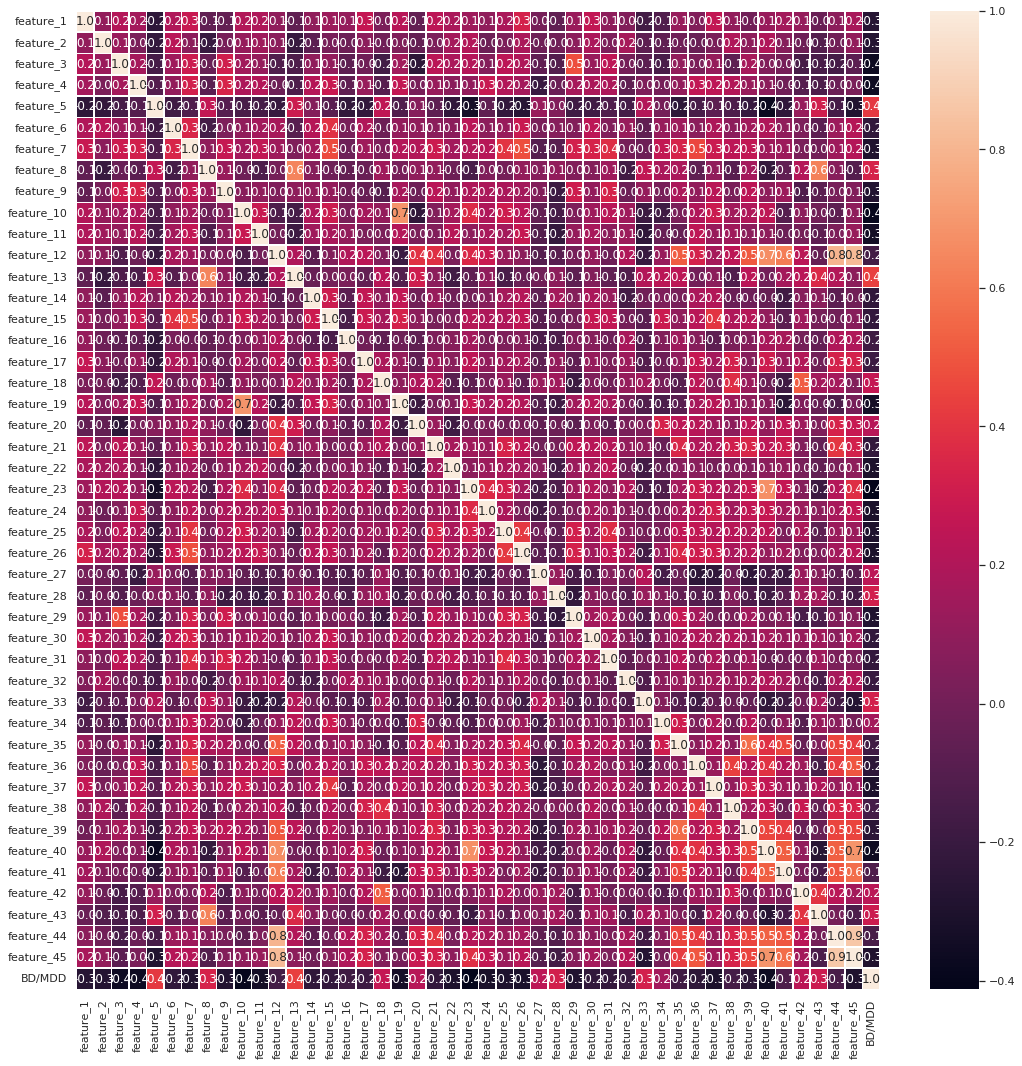

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
model_names = ['RandomForrestClassifier','NaiveBase', 'DecisionTreeClassifier', ' LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis']
PrecisionTable = pd.DataFrame(columns=model_names)
AccuracyTable = pd.DataFrame(columns=model_names)
SensitivityTable = pd.DataFrame(columns=model_names)
SpecificityTable = pd.DataFrame(columdataset.dtypes,ns=model_names)
F1_ScoreTable = pd.DataFrame(columns=model_names)
AUCTable = pd.DataFrame(columns=model_names)
# accuracy = make_scorer(accuracy_score)
# precision = make_scorer(precision_score)
# f1_score = make_scorer(f1_score)
# specificity = make_scorer(recall_score, pos_label=0)
# sensitivity = make_scorer(recall_score, pos_label=1)
# roc_auc = make_scorer(roc_auc_score)
# score_list = [accuracy, precision, f1_score, specificity, sensitivity, roc_auc]
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'f1_score':make_scorer(f1_score),
           'specificity':make_scorer(recall_score, pos_label=2),
           'sensitivity':make_scorer(recall_score, pos_label=1),
           'roc_auc':make_scorer(roc_auc_score)
          }

NameError: ignored

In [ ]:
X = data[[]]
y = data[['BD/MDD']]

In [ ]:
def get_mean_scores(model, X, y):
    mean_score = []
    for col in column_name:
        X[col] = data[col]
        mean_score.append(cross_val_score(model, X, y, cv=5))
    return np.mean(mean_score)

In [ ]:
precision_score_rf=[]
precision_score_dt=[]
precision_score_nb=[]
precision_score_lda=[]
precision_score_qda=[]

accuracy_score_rf=[]
accuracy_score_dt=[]
accuracy_score_nb=[]
accuracy_score_lda=[]
accuracy_score_qda=[]

f1_score_rf=[]
f1_score_dt=[]
f1_score_nb=[]
f1_score_lda=[]
f1_score_qda=[]

sensitivity_score_rf=[]
sensitivity_score_dt=[]
sensitivity_score_nb=[]
sensitivity_score_lda=[]
sensitivity_score_qda=[]

specificity_score_rf=[]
specificity_score_dt=[]
specificity_score_nb=[]
specificity_score_lda=[]
specificity_score_qda=[]

roc_auc_score_rf=[]
roc_auc_score_dt=[]
roc_auc_score_nb=[]
roc_auc_score_lda=[]
roc_auc_score_qda=[]

In [ ]:
for col in column_name:
    X.loc[:,-1]=data[col]
    ScoreDict_rf = {}
    ScoreDict_dt = {}
    ScoreDict_nb = {}
    ScoreDict_lda = {}
    ScoreDict_qda = {}
    for i in range(100):
        ScoreDict_rf = cross_validate(RandomForestClassifier(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_dt = cross_validate(DecisionTreeClassifier(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_nb = cross_validate(GaussianNB(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_lda = cross_validate(LinearDiscriminantAnalysis(), X, y.values.ravel(), scoring=scoring, cv=5)
        ScoreDict_qda = cross_validate(QuadraticDiscriminantAnalysis(), X, y.values.ravel(), scoring=scoring, cv=5)
    for k,v in ScoreDict_rf.items():
        ScoreDict_rf[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_dt.items():
        ScoreDict_dt[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_nb.items():
        ScoreDict_nb[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_lda.items():
        ScoreDict_lda[k] = sum(v)/ float(len(v))
    for k,v in ScoreDict_qda.items():
        ScoreDict_qda[k] = sum(v)/ float(len(v))
    #print(ScoreDict_rf)
    precision_score_rf.append(ScoreDict_rf['test_precision'])
    precision_score_dt.append(ScoreDict_dt['test_precision'])
    precision_score_nb.append(ScoreDict_nb['test_precision'])
    precision_score_lda.append(ScoreDict_lda['test_precision'])
    precision_score_qda.append(ScoreDict_qda['test_precision'])
    
    accuracy_score_rf.append(ScoreDict_rf['test_accuracy'])
    accuracy_score_dt.append(ScoreDict_dt['test_accuracy'])
    accuracy_score_nb.append(ScoreDict_nb['test_accuracy'])
    accuracy_score_lda.append(ScoreDict_lda['test_accuracy'])
    accuracy_score_qda.append(ScoreDict_qda['test_accuracy'])
    
    f1_score_rf.append(ScoreDict_rf['test_f1_score'])
    f1_score_dt.append(ScoreDict_dt['test_f1_score'])
    f1_score_nb.append(ScoreDict_nb['test_f1_score'])
    f1_score_lda.append(ScoreDict_lda['test_f1_score'])
    f1_score_qda.append(ScoreDict_qda['test_f1_score'])
    
    sensitivity_score_rf.append(ScoreDict_rf['test_sensitivity'])
    sensitivity_score_dt.append(ScoreDict_dt['test_sensitivity'])
    sensitivity_score_nb.append(ScoreDict_nb['test_sensitivity'])
    sensitivity_score_lda.append(ScoreDict_lda['test_sensitivity'])
    sensitivity_score_qda.append(ScoreDict_qda['test_sensitivity'])
    
    specificity_score_rf.append(ScoreDict_rf['test_specificity'])
    specificity_score_dt.append(ScoreDict_dt['test_specificity'])
    specificity_score_nb.append(ScoreDict_nb['test_specificity'])
    specificity_score_lda.append(ScoreDict_lda['test_specificity'])
    specificity_score_qda.append(ScoreDict_qda['test_specificity'])
    
    roc_auc_score_rf.append(ScoreDict_rf['test_roc_auc'])
    roc_auc_score_dt.append(ScoreDict_dt['test_roc_auc'])
    roc_auc_score_nb.append(ScoreDict_nb['test_roc_auc'])
    roc_auc_score_lda.append(ScoreDict_lda['test_roc_auc'])
    roc_auc_score_qda.append(ScoreDict_qda['test_roc_auc'])
    
PrecisionTable['RandomForrestClassifier'] = precision_score_rf
PrecisionTable['DecisionTreeClassifier'] = precision_score_dt
PrecisionTable['NaiveBase'] = precision_score_nb
PrecisionTable['LinearDiscriminantAnalysis'] = precision_score_lda
PrecisionTable['QuadraticDiscriminantAnalysis'] = precision_score_qda

AccuracyTable['RandomForrestClassifier'] = accuracy_score_rf
AccuracyTable['DecisionTreeClassifier'] = accuracy_score_dt
AccuracyTable['NaiveBase'] = accuracy_score_nb
AccuracyTable['LinearDiscriminantAnalysis'] = accuracy_score_lda
AccuracyTable['QuadraticDiscriminantAnalysis'] = accuracy_score_qda

F1_ScoreTable['RandomForrestClassifier'] = f1_score_rf
F1_ScoreTable['DecisionTreeClassifier'] = f1_score_dt
F1_ScoreTable['NaiveBase'] = f1_score_nb
F1_ScoreTable['LinearDiscriminantAnalysis'] = f1_score_lda
F1_ScoreTable['QuadraticDiscriminantAnalysis'] = f1_score_qda

SpecificityTable['RandomForrestClassifier'] = specificity_score_rf
SpecificityTable['DecisionTreeClassifier'] = specificity_score_dt
SpecificityTable['NaiveBase'] = specificity_score_nb
SpecificityTable['LinearDiscriminantAnalysis'] = specificity_score_lda
SpecificityTable['QuadraticDiscriminantAnalysis'] = specificity_score_qda

SensitivityTable['RandomForrestClassifier'] = sensitivity_score_rf
SensitivityTable['DecisionTreeClassifier'] = sensitivity_score_dt
SensitivityTable['NaiveBase'] = sensitivity_score_nb
SensitivityTable['LinearDiscriminantAnalysis'] = sensitivity_score_lda
SensitivityTable['QuadraticDiscriminantAnalysis'] = sensitivity_score_qda

AUCTable['RandomForrestClassifier'] = roc_auc_score_rf
AUCTable['DecisionTreeClassifier'] = roc_auc_score_dt
AUCTable['NaiveBase'] = roc_auc_score_nb
AUCTable['LinearDiscriminantAnalysis'] = roc_auc_score_lda
AUCTable['QuadraticDiscriminantAnalysis'] = roc_auc_score_qda
    #PrecisionTable = PrecisionTable.append(precision_score_rf)
#     PrecisionTable = PrecisionTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_precision'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_precision')},ignore_index=True)
#     AccuracyTable = AccuracyTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_accuracy'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_accuracy')},ignore_index=True)
#     AUCTable = AUCTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_roc_auc'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_roc_auc')},ignore_index=True)
#     F1_ScoreTable = F1_ScoreTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_f1_score'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_f1_score')},ignore_index=True)
#     SpecificityTable = SpecificityTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_specificity'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_specificity')},ignore_index=True)
#     SensitivityTable = SensitivityTable.append({'RandomForrestClassifier' : ScoreDict_rf.get('test_sensitivity'), 'DecisionTreeClassifier' : ScoreDict_dt.get('test_sensitivity')},ignore_index=True)

#     PrecisionTable = PrecisionTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_precision')},ignore_index=True)
#     AccuracyTable = AccuracyTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_accuracy')},ignore_index=True)
#     AUCTable = AUCTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_roc_auc')},ignore_index=True)
#     F1_ScoreTable = F1_ScoreTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_f1_score')},ignore_index=True)
#     SpecificityTable = SpecificityTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_specificity')},ignore_index=True)
#     SensitivityTable = SensitivityTable.append({'DecisionTreeClassifier' : ScoreDict_dt.get('test_sensitivity')},ignore_index=True)
    
    #         precision_score_rf.append(ScoreDict.get('test_precision'))
#     precision_score_mean.append(np.mean(precision_score_rf))
#     results = models.cross_validate(estimator=RandomForestClassifier(),
#                                           X=X,
#                                           y=y.values.ravel(),
#                                           scoring=scoring,
#                                           cv=5,)
print(ScoreDict_rf)
print(ScoreDict_dt)
    #PrecisionTable['RandomForrestClassifier']
#     score_dt.append(cross_val_score(DecisionTreeClassifier(), X, y, cv=5))
#     score_nb.append(cross_val_score(GaussianNB(), X, y, cv=5))
#     score_lda.append(cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=5))
#     score_qda.append(cross_val_score(QuadraticDiscriminantAnalysis(), X, y, cv=5))

In [ ]:
PrecisionTable.index = np.arange(1, len(PrecisionTable) + 1)

In [ ]:
AUCTable

In [ ]:
AccuracyTable

In [ ]:
PrecisionTable

In [ ]:
SensitivityTable

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10))
# plt.legend(loc="upper left")
# PrecisionTable.plot(x=PrecisionTable.rows, y=('RandomForrestClassifier','NaiveBase'),kind='scatter')
#plt.show(PrecisionTable.plot())
PrecisionTable.plot()

In [ ]:
SensitivityTable
SensitivityTable.plot()

In [ ]:
AccuracyTable.plot()

In [ ]:
SpecificityTable
SpecificityTable.plot()

In [ ]:
F1_ScoreTable.plot()

In [ ]:
AUCTable.plot()